In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Telco_customer_churn.xlsx to Telco_customer_churn.xlsx


In [ ]:
file_path = "/content/Telco_customer_churn.xlsx"
df = pd.read_excel(file_path)

In [ ]:
print(df.info())
print(df.isnull().sum())
print(df.describe())
print(df.shape)
print(df.columns)
print(df[["Churn Label", "Churn Value", "Churn Score", "Churn Reason"]].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

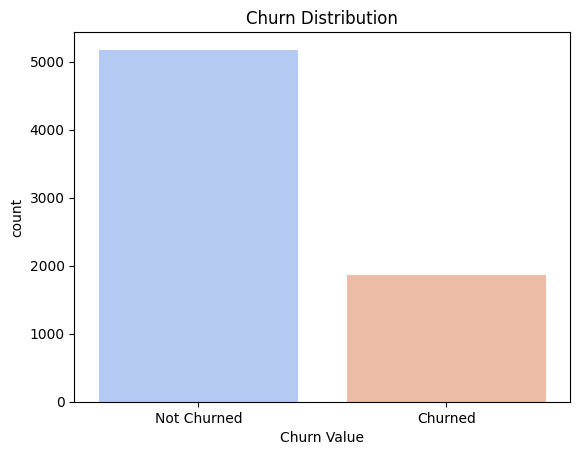

In [ ]:
sns.countplot(x=df["Churn Value"], palette="coolwarm")
plt.title("Churn Distribution")
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
df["Churn Value"].value_counts(normalize=True) * 100


,proportion
Churn Value,
0,73.463013
1,26.536987


In [ ]:
df = df.drop(["CustomerID", "Churn Label", "Churn Score", "Churn Reason"], axis=1)

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
df_mean = df[numeric_cols].mean()
df[numeric_cols] = df[numeric_cols].fillna(df_mean)

In [ ]:
categorical_cols = df.select_dtypes(include=["object"]).columns
df[categorical_cols] = df[categorical_cols].astype(str)


label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


print(df.dtypes)


Count                  int64
Country                int64
State                  int64
City                   int64
Zip Code               int64
Lat Long               int64
Latitude             float64
Longitude            float64
Gender                 int64
Senior Citizen         int64
Partner                int64
Dependents             int64
Tenure Months          int64
Phone Service          int64
Multiple Lines         int64
Internet Service       int64
Online Security        int64
Online Backup          int64
Device Protection      int64
Tech Support           int64
Streaming TV           int64
Streaming Movies       int64
Contract               int64
Paperless Billing      int64
Payment Method         int64
Monthly Charges      float64
Total Charges          int64
Churn Value            int64
CLTV                   int64
dtype: object


In [ ]:
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
X = df.drop('Churn Value', axis=1)
y = df['Churn Value'].astype(int)

In [ ]:
X = df[['Contract', 'Tech Support', 'Dependents', 'Monthly Charges']]
y = df['Churn Value']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'min_child_weight': [5, 10],
    'reg_lambda': [5, 10, 15],
    'reg_alpha': [0, 1, 5]
}


grid_search = GridSearchCV(XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False),
                           param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'min_child_weight': [5, 10],
                         'n_estimators': [50, 75, 100], 'reg_alpha': [0, 1, 5],
                         'reg_lambda': [5, 10, 15], 'subsample': [0.6, 0.8]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters for XGBoost:", best_params)

xgb_model = XGBClassifier(n_estimators=75, max_depth=4, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)



Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 5, 'subsample': 0.6}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))
    print("Validation Accuracy:", accuracy_score(y_val, model.predict(X_val)))
    print("Test Accuracy:", accuracy_score(y_test, model.predict(X_test)))

evaluate_model(xgb_model, X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test)

Train Accuracy: 0.7763666482606295
Validation Accuracy: 0.7481060606060606
Test Accuracy: 0.7578051087984863


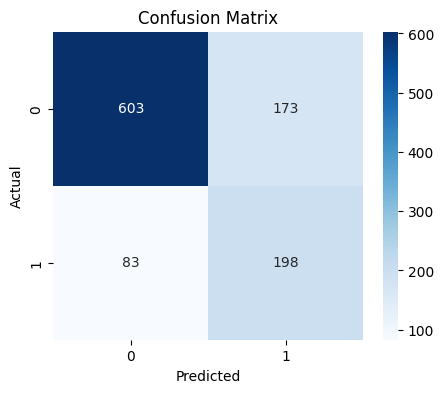

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, xgb_model.predict(X_test)), annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pickle
filename = 'xgb_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

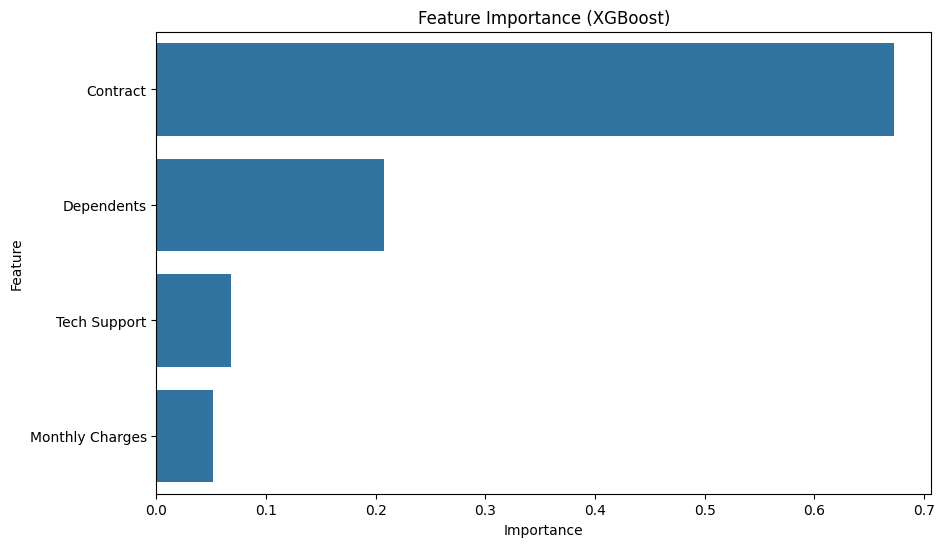

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'])
plt.title("Feature Importance (XGBoost)")
plt.show()
